In [7]:
import numpy as np

In [8]:
import pandas as pd

In [87]:
df= pd.read_csv('headbrain.csv')

In [88]:
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [63]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
import sklearn

In [42]:
import seaborn as sns

In [43]:
import matplotlib.pyplot as plt

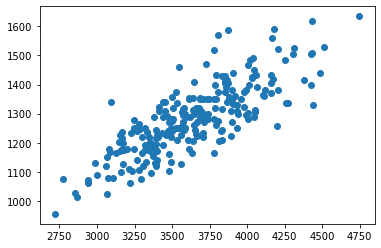

In [44]:
plt.scatter(df['HeadSize'],df['BrainWeight'])

In [45]:
df.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [46]:
df.shape

(237, 4)

In [47]:
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [48]:
df.count


<bound method DataFrame.count of      Gender  AgeRange  HeadSize  BrainWeight
0         1         1      4512         1530
1         1         1      3738         1297
2         1         1      4261         1335
3         1         1      3777         1282
4         1         1      4177         1590
..      ...       ...       ...          ...
232       2         2      3214         1110
233       2         2      3394         1215
234       2         2      3233         1104
235       2         2      3352         1170
236       2         2      3391         1120

[237 rows x 4 columns]>

In [49]:
print(df.isnull().sum())

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64


In [50]:
df= df.dropna()

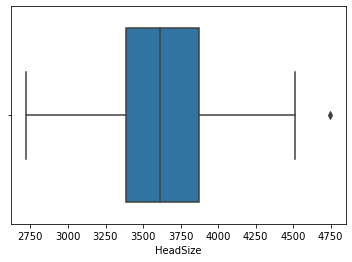

In [51]:
sns.boxplot(x=df['HeadSize'])

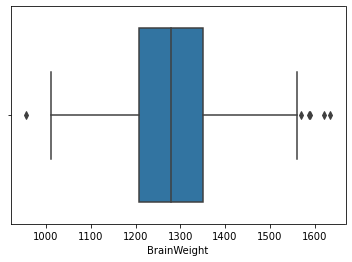

In [52]:
sns.boxplot(x=df['BrainWeight'])

In [53]:
from scipy.stats import iqr

In [54]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
print(IQR)

Gender           1.0
AgeRange         1.0
HeadSize       487.0
BrainWeight    143.0
dtype: float64


In [55]:
df= df[~((df< (Q1-1.5 * IQR)) |(df>(Q3 +1.5*IQR))).any(axis=1)]

In [57]:
df.shape

(231, 4)

In [58]:
df.size

924

In [66]:
X= df['HeadSize']
y= df['BrainWeight']


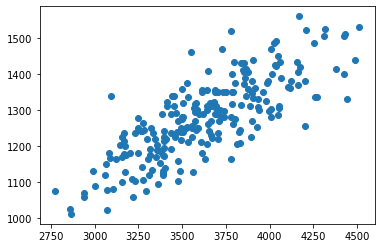

In [56]:
plt.scatter(X,y)

In [92]:
print("Checking for unique values in each column:\n")
print(df.nunique())

Checking for unique values in each column:

Gender           2
AgeRange         2
HeadSize       221
BrainWeight    146
dtype: int64


In [74]:
plt.show()

In [75]:
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.metrics import classification_report

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [90]:
import os

In [91]:
print("df Info :\n")
print(df.info())


df Info :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gender       237 non-null    int64
 1   AgeRange     237 non-null    int64
 2   HeadSize     237 non-null    int64
 3   BrainWeight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


In [94]:
df  = df.values

X = df[:,2]
Y = df[:,3]

X.shape,Y.shape

((237,), (237,))

Linear Regression model are used to show or predict the relationship between a dependent variable (target variable) and independent variable(s). It can be used to check if there exists any correlation between the variables.

The current data set in an example of Simple Linear Regression. We have a target or the dependent variable,which is Brain Weight. The independent variable here is the Head Size.

The formula goes like this -

y = mx+c

# Calculate the slope and y-intercept

In [95]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)


In [99]:
def Linear_Regression(X,Y):
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    m = numerator/ denominator
    c = mean_y - m * mean_x
    
    return(m,c)

def predict(X,m,c):
    pred_y=[]
    for i in range(len(X)):
        pred_y.append(c + m * X[i])

    return(pred_y)

# Now let's calculate the R-Square value (Coefficient of determination)

y_obs -> observed data

y_pred -> predicted value of y from the formula (y=mx+c)

y_hat -> mean of y_obs

total_sum_of_squares(ss_tot) -> sum( (y_obs - y_hat) ** 2 )

sum_of_squares(ss_res) -> sum( (y_obs - y_pred) ** 2 )

r2 -> 1 - total_sum_of_squares/sum_of_squares

In [100]:
def r2score(y_obs,y_pred):
    yhat = np.mean(y_obs)
    
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(len(y_obs)):
        ss_tot += (y_obs[i]-yhat)**2
        ss_res += (y_obs[i]-y_pred[i])**2
        
    r2 = 1 - (ss_res/ss_tot)

    return r2

slope =  0.2687292257058937
intercept =  308.1012574596532
R-squared : 0.6073920562076418


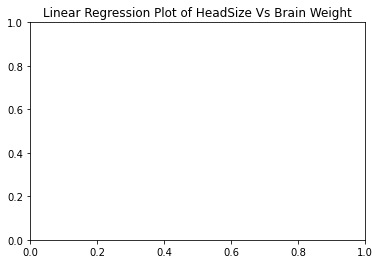

In [101]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

m,c = Linear_Regression(X_train,y_train)
print("slope = ", m)
print('intercept = ',c)
      
y_pred =  predict(X_test,m,c)

print("R-squared :",r2score(y_test,y_pred))

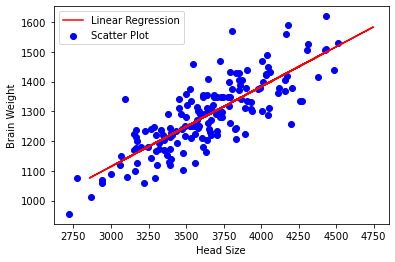

In [102]:
plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

In [103]:
X = X.reshape(len(X),1)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_predictions = reg.predict(X_test)

print("R-squared :",r2_score(y_test, y_predictions))

R-squared : 0.5797082636205464
